# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
# feature scaling method receive a 2D array
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on whole dataset

In [9]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X, y)

c:\users\pedro\documents\machine-learning-course\venv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predict a new result

In [10]:
x_val_scal = sc_x.transform([[6.5]])        # get scaled value of 6.5
y_val_scal = svr.predict(x_val_scal)        # get scaled value of y(6.5)
print(sc_y.inverse_transform(y_val_scal))   # unscale y(6.5)

[170370.0204065]


## Visualize the SVR results

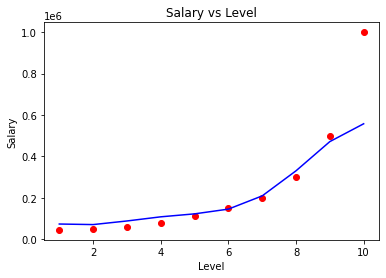

In [13]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(svr.predict(X)), color='blue')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualize the SVR results
### (for higher resolution and smoother curve)

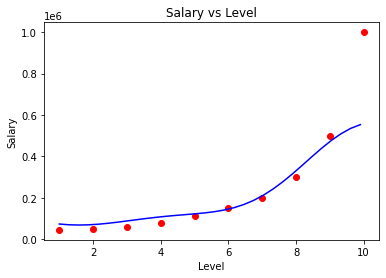

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X_grid), sc_y.inverse_transform(svr.predict(X_grid)), color='blue')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()
